In [1]:
import os
import warnings
from pathlib import Path

warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib as mpl
import mplscience
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix

%load_ext autoreload
%autoreload 2

In [2]:
output = Path(
    "/lustre/groups/ml01/workspace/moscot_paper/mapping/results"
)
results = []
for file in os.listdir(output):
    l = file.split(",")
    params = {}
    if (output / file / "results.csv").is_file():
        for i in l:
            k, v = i.split("=")
            params.update({k: v})
        df = pd.DataFrame(params, index=[0])
        res = pd.read_csv(output / file / "results.csv", index_col=0)
        df = pd.concat([df, res], axis=1)
        results.append(df)
out = pd.concat(results)
out

,launcher,moscot.alpha,moscot.gamma,moscot.initializer,moscot.rank,moscot.sc_attr,moscot.tau_a,time,corr_results_mean_pearson,corr_results_median_pearson,corr_results_var_pearson,corr_results_max_pearson,corr_results_min_pearson,corr_results_mean_spearman,corr_results_median_spearman,corr_results_var_spearman,corr_results_max_spearman,corr_results_min_spearman,wd_Endothelial cells_CD38,wd_Kupffer cells_Folate
0,icb,0.1,10,random,300,X_pca_cite,0.2,0 days 01:26:34.093478,0.044251,0.019501,0.004565,0.232452,-0.088691,0.151663,0.164207,0.016928,0.446944,-0.269710,0.767301,7.353728
0,icb,0.3,1,k-means,300,X_pca,0.5,0 days 02:29:38.567988,0.181351,0.121069,0.067051,0.826836,-0.282045,0.104215,0.097259,0.038076,0.652547,-0.399239,0.355436,0.507441
0,icb,0.3,1,random,200,X_pca,1,0 days 01:55:42.791153,0.155786,0.103265,0.047843,0.757727,-0.250020,0.105535,0.096603,0.034140,0.624285,-0.450224,0.239191,0.415620
0,icb,0.3,100,k-means,200,X_pca,0.5,0 days 03:30:10.277977,0.184003,0.129322,0.066162,0.826981,-0.275263,0.093117,0.079123,0.036650,0.638760,-0.374649,0.356750,0.521593
0,icb,0.1,100,random,200,X_pca,0.5,0 days 02:57:06.768905,0.179771,0.119794,0.050666,0.642247,-0.310442,0.127132,0.097377,0.023825,0.659556,-0.199965,0.693103,1.941994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,icb,0.1,1,random,200,X_pca,0.2,0 days 02:19:38.138106,0.041107,0.013493,0.004176,0.235407,-0.084548,0.157581,0.153701,0.013434,0.431873,-0.275753,0.781987,8.302002
0,icb,0.1,100,k-means,200,X_pca,0.1,0 days 02:30:55.991123,0.011611,0.004416,0.000343,0.083004,-0.030756,0.112854,0.124132,0.015778,0.455152,-0.337150,0.643683,4.466017
0,icb,0.3,1,k-means,300,X_pca_cite,0.2,0 days 01:24:49.474405,0.143574,0.082889,0.056422,0.702025,-0.470513,0.133683,0.131869,0.022782,0.580062,-0.318887,0.604238,1.796032
0,icb,0.3,10,k-means,200,X_pca,0.1,0 days 02:23:22.861340,0.094517,0.054156,0.026614,0.454930,-0.229185,0.077426,0.093386,0.035404,0.508043,-0.421774,0.896245,8.812411


In [3]:
out["time"]

0    0 days 01:26:34.093478
0    0 days 02:29:38.567988
0    0 days 01:55:42.791153
0    0 days 03:30:10.277977
0    0 days 02:57:06.768905
              ...          
0    0 days 02:19:38.138106
0    0 days 02:30:55.991123
0    0 days 01:24:49.474405
0    0 days 02:23:22.861340
0    0 days 02:03:46.892833
Name: time, Length: 133, dtype: object

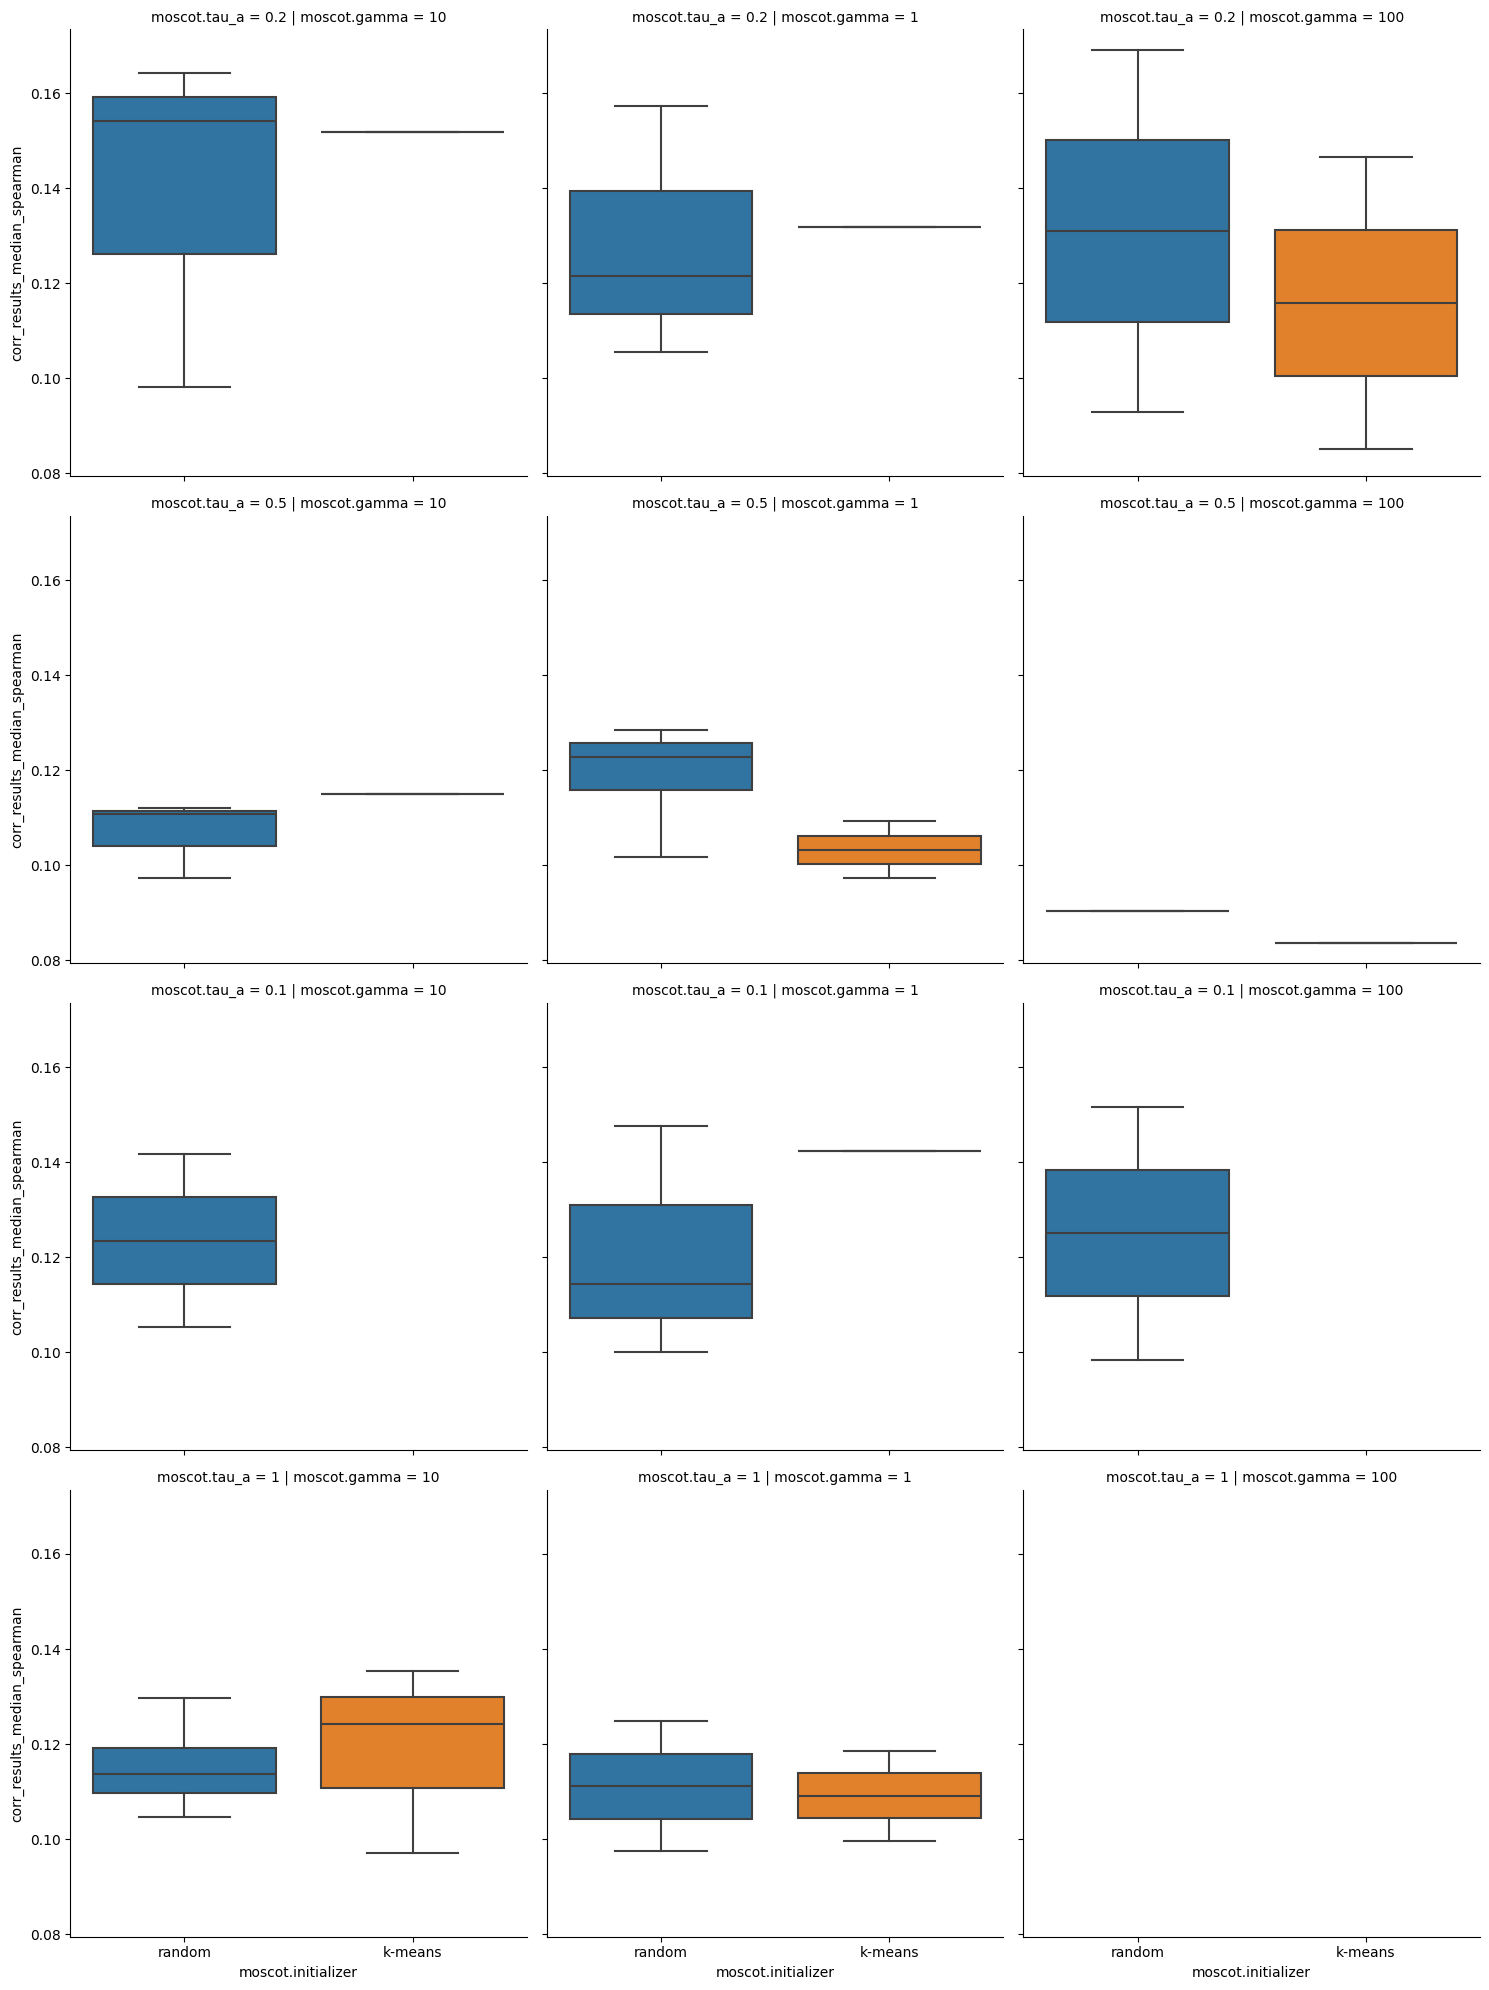

In [14]:
outplot = sns.catplot(
    data=out[out["moscot.rank"]=="300"],
    x="moscot.initializer",
    y="corr_results_median_spearman",
    col="moscot.gamma",
    row="moscot.tau_a",
    # col_wrap=5,
    kind="box",
)
# outplot.set_xlabels("steps", clear_inner=False)
plt.tight_layout()